In [1]:
import time

from coffea import hist, util
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from functools import partial
import uproot

from awkward import JaggedArray
import numpy as np
import pickle

from coffea.lookup_tools import extractor, dense_lookup

import matplotlib.pyplot as plt
from matplotlib import ticker,colors

In [2]:
output = util.load('ttgamma.coffea')

Plot photon categories, Rebinning as well

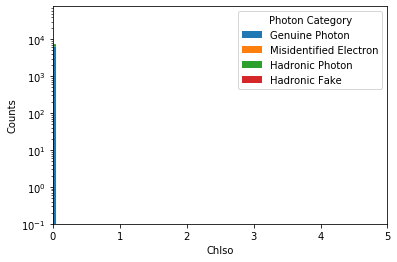

In [3]:
h = output['photon_chIso'].sum("dataset").sum("year").sum("lepFlavor").rebin('chIso',hist.Bin("chIso",'ChIso',np.arange(0,20.001,.05)))
plotInfo = hist.plot1d(hist=h,stack=True,overlay='category')
ax = plotInfo[1]
ax.set_ylim(1e-1,ax.get_ylim()[-1]*10)
ax.set_xlim(0,5)

ax.set_yscale('log')


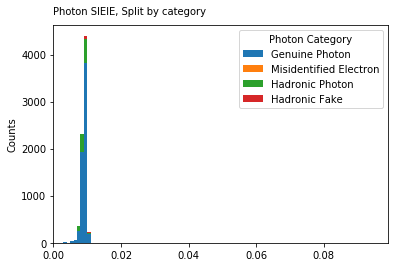

In [4]:
h = output['photon_sieie'].sum("dataset").sum("year").sum("lepFlavor").rebin('sieie',hist.Bin("sieie",'',np.arange(0,0.1,.001)))
plotInfo=hist.plot1d(hist=h, stack=True,overlay='category');
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'Photon SIEIE, Split by category');

Plot by samples instead of photon categories

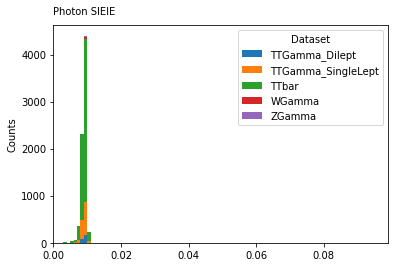

In [5]:
h = output['photon_sieie'].sum("category").sum("year").sum("lepFlavor").rebin('sieie',hist.Bin("sieie",'',np.arange(0,0.1,.001)))
plotInfo = hist.plot1d(hist=h,stack=True,overlay='dataset');
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'Photon SIEIE');

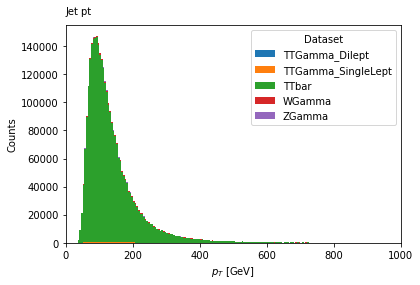

In [6]:
plotInfo = hist.plot1d(output['pt_jet'].integrate('year','2016').sum("lepFlavor").sum("nBjet").sum("nPho"),overlay='dataset',stack=True);
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'Jet pt');

Group all ttgamma into one

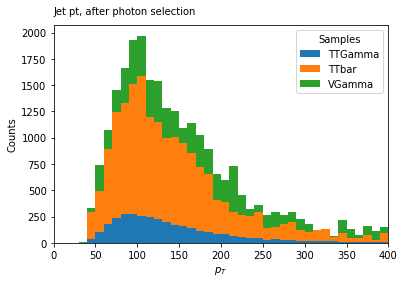

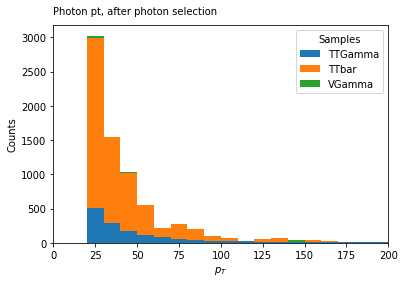

In [7]:
x= {
    'TTGamma': ['TTGamma_Dilept','TTGamma_SingleLept'],
    'VGamma': ['ZGamma', 'WGamma'],
    'TTbar': 'TTbar',
  }

h = output['pt_jet'].group('dataset',hist.Cat(r'dataset',r'Samples'),x).sum('year').sum("lepFlavor").sum("nBjet").integrate("nPho",slice(1,None))
h = h.rebin('pt',hist.Bin('pt','$p_{T}$',np.arange(0,400.1,10)))
plotInfo = hist.plot1d(h,overlay='dataset',stack=True)
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'Jet pt, after photon selection');

h = output['photon_pt'].group('dataset',hist.Cat(r'dataset',r'Samples'),x).integrate('year').sum('category').sum("lepFlavor")
h = h.rebin('pt',hist.Bin('pt','$p_{T}$',np.arange(0,200.1,10)))
plotInfo = hist.plot1d(h,overlay='dataset',stack=True)
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'Photon pt, after photon selection');

Select single dataset

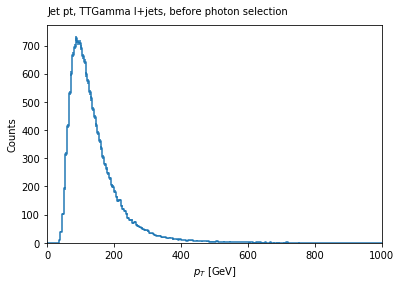

In [8]:
plotInfo = hist.plot1d(output['pt_jet'].integrate('year','2016').sum("lepFlavor").sum("nBjet").sum("nPho").integrate('dataset','TTGamma_SingleLept'));
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'Jet pt, TTGamma l+jets, before photon selection');

Delta R split by sample and split by photon category

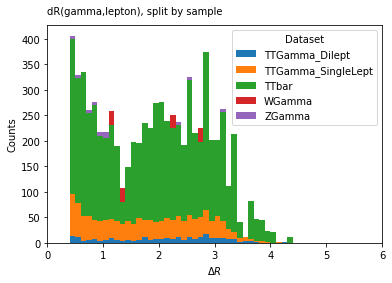

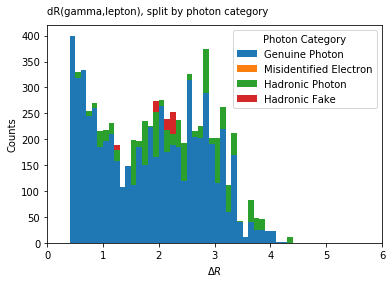

In [9]:
h = output['dR_lep_gamma'].rebin('dR',hist.Bin('dR','$\Delta R$',np.arange(0,6.1,.1)))
plotInfo = hist.plot1d(h.sum('year').sum('category').sum("lepFlavor"),stack=True,overlay='dataset');
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'dR(gamma,lepton), split by sample');
plotInfo = hist.plot1d(h.sum('year').sum('dataset').sum("lepFlavor"),stack=True,overlay='category');
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'dR(gamma,lepton), split by photon category');


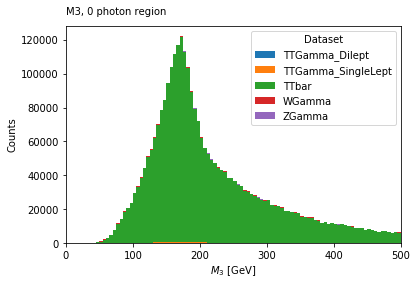

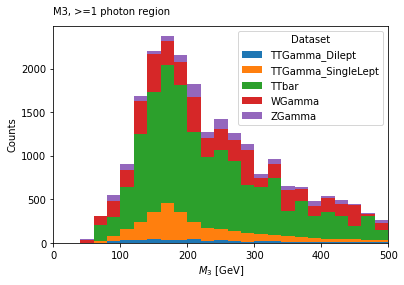

In [10]:
h = output['M3'].sum("year").integrate('nPho',0).sum("lepFlavor").sum("nBjet").rebin('M3',hist.Bin("M3",'$M_{3}$ [GeV]',np.arange(0,500.1,5)))#.rebin('mass',hist.Bin("mass",'',np.arange(0,500.1,10)))
plotInfo = hist.plot1d(hist=h,stack=True,overlay='dataset');
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'M3, 0 photon region');

h = output['M3'].sum("year").integrate('nPho',slice(1,None)).sum("lepFlavor").sum("nBjet").rebin('M3',hist.Bin("M3",'$M_{3}$ [GeV]',np.arange(0,500.1,20)))
plotInfo = hist.plot1d(hist=h,stack=True,overlay='dataset');
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'M3, >=1 photon region');


Plot 2016 Only

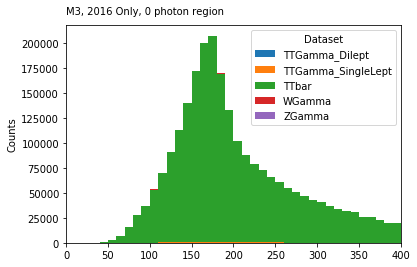

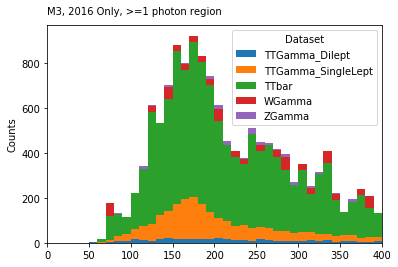

In [11]:
h = output['M3'].integrate("year",'2016').sum('lepFlavor').integrate('nBjet',slice(1,None)).rebin('M3',hist.Bin("M3",'',np.arange(0,400.1,10)))
plotInfo = hist.plot1d(hist=h.integrate('nPho',0),stack=True,overlay='dataset');
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'M3, 2016 Only, 0 photon region');

plotInfo = hist.plot1d(hist=h.integrate('nPho',slice(1,None)),stack=True,overlay='dataset');
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'M3, 2016 Only, >=1 photon region');


/Users/ncsmith/src/coffea/coffea/hist/hist_tools.py:346: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x10901c6d8>
  warnings.warn("Not all requested indices present in %r" % self, RuntimeWarning)


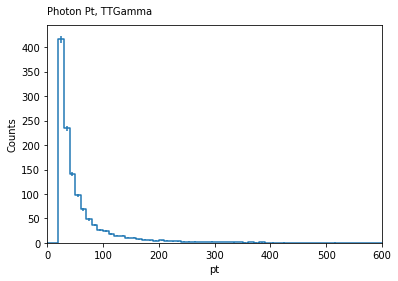

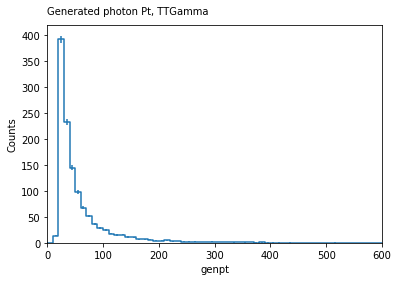

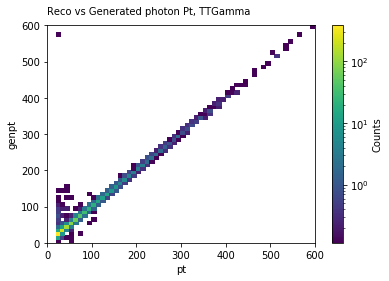

In [12]:
h = output['photon_RecoVsGenPt'].sum('year').sum('category').sum('lepFlavor').integrate('dataset',['TTGamma_SingleLept','TTGamma_DiLept'])

h = h.rebin('pt',hist.Bin("pt","pt",60,0,600)).rebin('genpt',hist.Bin("genpt","genpt",60,0,600))

plotInfo=hist.plot1d(h.sum("genpt"))
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'Photon Pt, TTGamma');

plotInfo=hist.plot1d(h.sum("pt"))
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'Generated photon Pt, TTGamma');

plotInfo=hist.plot2d(h,xaxis="pt",patch_opts={'norm':colors.LogNorm()})
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'Reco vs Generated photon Pt, TTGamma');


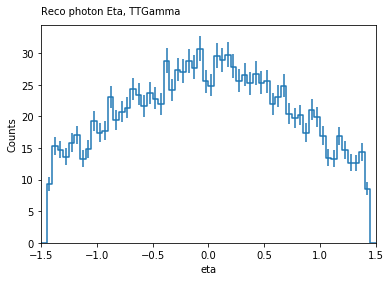

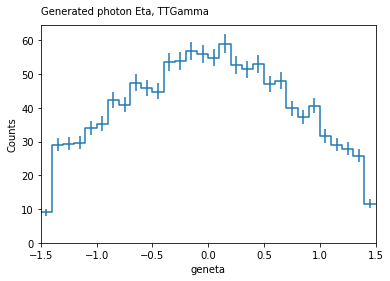

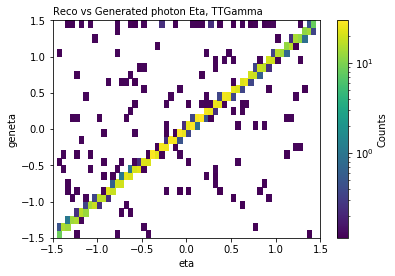

In [13]:
h = output['photon_RecoVsGenEta'].sum('year').sum('category').sum('lepFlavor').integrate('dataset',['TTGamma_SingleLept','TTGamma_DiLept'])

h = h.rebin('eta',hist.Bin("eta","eta",np.arange(-1.5,1.5001,0.05))).rebin('geneta',hist.Bin("geneta","geneta",np.arange(-1.5,1.5001,0.1)))#30,-1.5,1.50001))

plotInfo=hist.plot1d(h.sum("geneta"))
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'Reco photon Eta, TTGamma');

plotInfo=hist.plot1d(h.sum("eta"))
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'Generated photon Eta, TTGamma');

plotInfo=hist.plot2d(h,xaxis="eta",patch_opts={'norm':colors.LogNorm()})
plt.text(plotInfo[1].get_xlim()[0],plotInfo[1].get_ylim()[1]*1.05,'Reco vs Generated photon Eta, TTGamma');
